In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_excel(r"C:\Users\Shaurya\Desktop\india_test.xlsx",index_col="Date",parse_dates=["Date"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2020-03-02 to 2021-05-14
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Daily Confirmed  439 non-null    int64
 1   Total Confirmed  439 non-null    int64
 2   Total Recovered  439 non-null    int64
 3   Total Deceased   439 non-null    int64
 4   Active Case      439 non-null    int64
dtypes: int64(5)
memory usage: 20.6 KB


In [4]:
df.tail()

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case
Date,,,,,
2021-05-10,329491,22991820,19021163,249436,3721221
2021-05-11,348555,23340375,19376561,253634,3710180
2021-05-12,362632,23703007,19728566,257762,3716679
2021-05-13,343005,24046012,20073242,261762,3711008
2021-05-14,326014,24372026,20426092,265638,3680296


<AxesSubplot:xlabel='Date'>

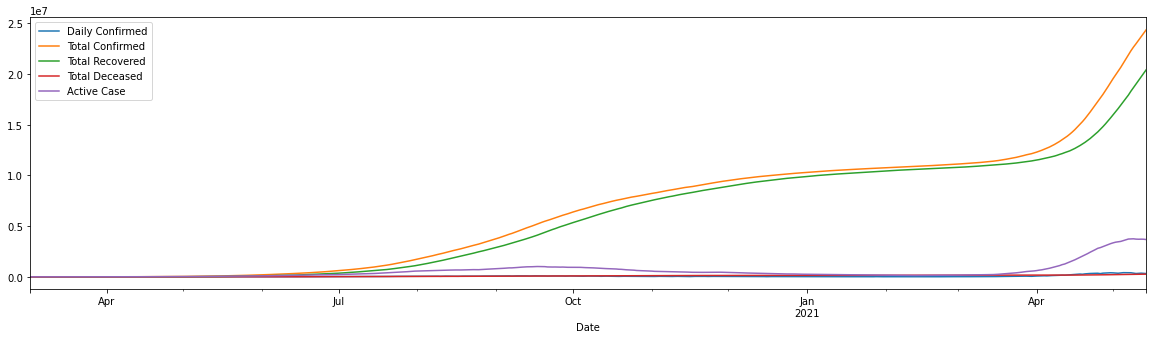

In [5]:
df.plot(figsize=(20,5))

In [6]:
df.tail(5)

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case
Date,,,,,
2021-05-10,329491,22991820,19021163,249436,3721221
2021-05-11,348555,23340375,19376561,253634,3710180
2021-05-12,362632,23703007,19728566,257762,3716679
2021-05-13,343005,24046012,20073242,261762,3711008
2021-05-14,326014,24372026,20426092,265638,3680296


In [7]:
ts = df["Total Confirmed"]

In [8]:
from statsmodels.tsa.stattools import adfuller
#Dickey Fuller Test
test = adfuller(ts)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])

ADF Statistic: 1.266365
p-value: 0.996414


In [11]:
#P value is more than 0.5 hence it is not stationary, making a log transformation

In [12]:
ts_log = np.log(ts)

<AxesSubplot:xlabel='Date'>

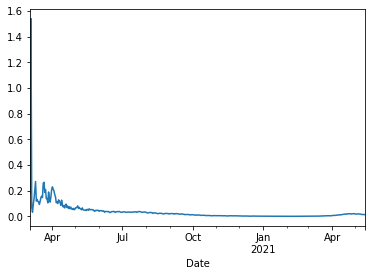

In [13]:
ts_log_diff = ts_log - ts_log.shift(1)
ts_log_diff = ts_log_diff.dropna(axis=0)
ts_log_diff.plot()

In [18]:
test2 = adfuller(ts_log_diff)
print('ADF Statistic: %f' % test2[0])
print('p-value: %f' % test2[1])

ADF Statistic: -5.742663
p-value: 0.000001


In [19]:
#P value is less than 0.5 hence it is stationary

In [20]:
#ts_log_diff0 = ts_log_diff - ts_log_diff.shift(1)
#ts_log_diff0 = ts_log_diff0.dropna(axis=0)
#adfuller_test(ts_log_diff0)
#ts_log_diff0.plot()

<AxesSubplot:xlabel='Date'>

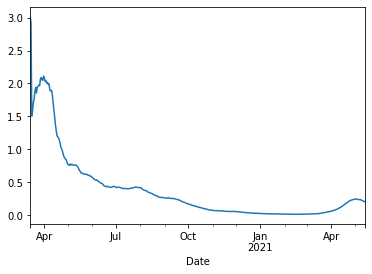

In [21]:
ts_log_diffS = ts_log - ts_log.shift(12)
ts_log_diffS = ts_log_diffS.dropna(axis=0)
ts_log_diffS.plot()

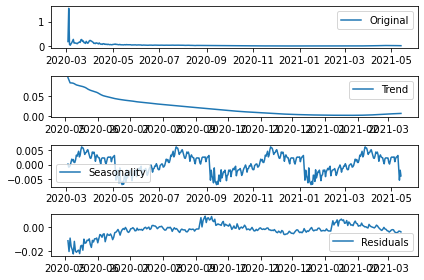

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_diff,period=124)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

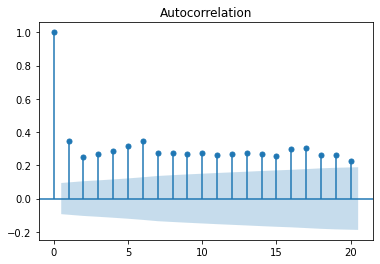

In [24]:
ACF = plot_acf(ts_log_diff,lags=20)

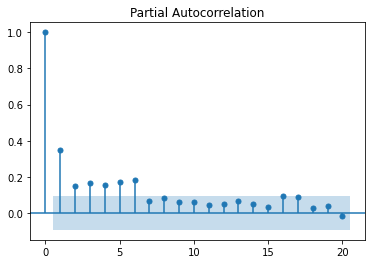

In [25]:
PACF = plot_pacf(ts_log_diff,lags=20)

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [27]:
import itertools
import warnings
warnings.filterwarnings("ignore")

In [29]:
#Applied HyperParameters for time serise to get P,D,Q (Removed)

In [30]:
#SARIMAX

In [21]:
model=sm.tsa.statespace.SARIMAX(ts,order=(11, 1, 8),seasonal_order=(15, 1, 12, 12),enforce_stationarity=False,enforce_invertibility=False)
results=model.fit()

<AxesSubplot:xlabel='Date'>

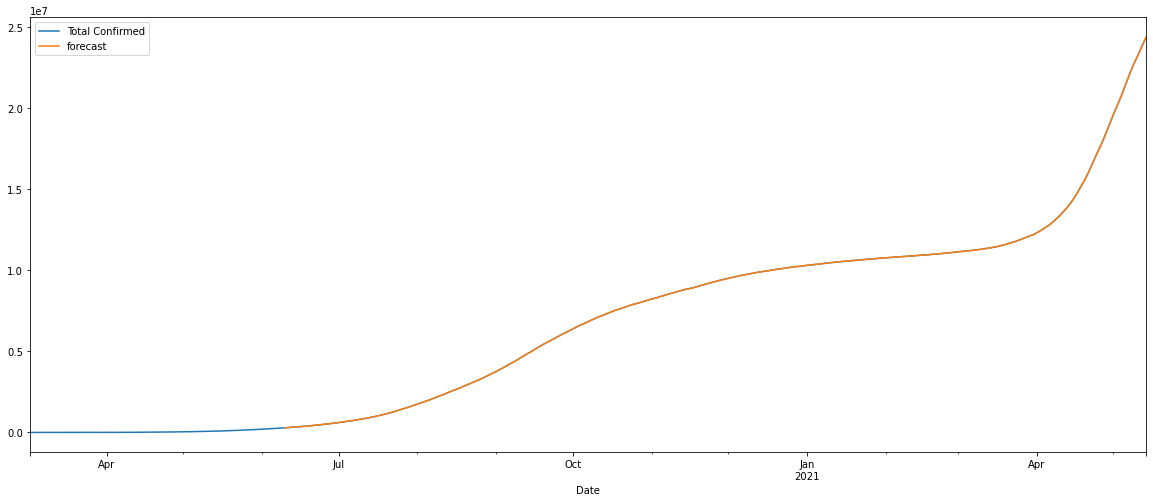

In [22]:
df['forecast']=results.predict(start=100,end=600)
df[['Total Confirmed','forecast']].plot(figsize=(20,8))

In [23]:
print(results.summary())

                                                         SARIMAX Results                                                          
Dep. Variable:                                                            Total Confirmed   No. Observations:                  439
Model:             SARIMAX(11, 1, 8)x(15, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 12)   Log Likelihood               -2324.937
Date:                                                                    Sat, 15 May 2021   AIC                           4743.873
Time:                                                                            11:00:38   BIC                           4906.474
Sample:                                                                        03-02-2020   HQIC                          4809.426
                                                                             - 05-14-2021                                         
Covariance Type:                                                                   

In [24]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,10)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case,forecast
2021-05-19,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-22,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

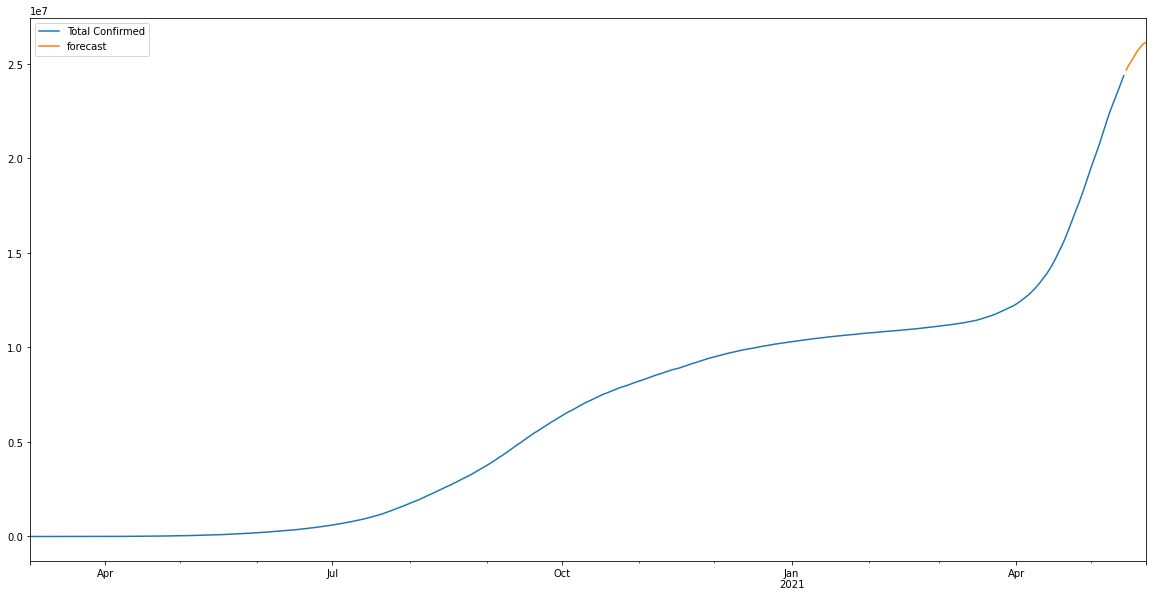

In [30]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 439, end = 448, dynamic= True)  
future_df[['Total Confirmed', 'forecast']].plot(figsize=(20, 10))

In [31]:
future_df.to_excel('15 Total_Confirmed 11 1 8_15 1 12 12.xlsx')

In [32]:
future_df.tail()

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case,forecast
2021-05-19,NaN,NaN,NaN,NaN,NaN,2.558452e+07
2021-05-20,NaN,NaN,NaN,NaN,NaN,2.577605e+07
2021-05-21,NaN,NaN,NaN,NaN,NaN,2.594450e+07
2021-05-22,NaN,NaN,NaN,NaN,NaN,2.607484e+07
2021-05-23,NaN,NaN,NaN,NaN,NaN,2.614398e+07
